In [1980]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import data

In [1981]:
df=pd.read_csv('train.csv')

In [1982]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


* survival	Survival	0 = No, 1 = Yes
* pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* sex	Sex	
* Age	Age in years	
* sibsp	# of siblings / spouses aboard the Titanic	
* parch	# of parents / children aboard the Titanic	
* ticket	Ticket number	
* fare	Passenger fare	
* cabin	Cabin number	
* embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [1983]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [1984]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1985]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1986]:
df.duplicated().sum()

0

# data preprocess

In [1987]:
df.drop(['PassengerId','Name'],axis=1,inplace=True)

In [1988]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


### pclass 

In [1989]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [1990]:
df['Pclass'].isnull().sum()

0

In [1991]:
df['Pclass'].dtype

dtype('int64')

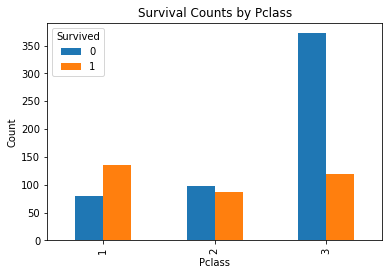

In [1992]:
counts = df.groupby('Pclass')['Survived'].value_counts().unstack()
counts.plot(kind='bar')
plt.title('Survival Counts by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

### Sex

In [1993]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [1994]:
df['Sex'].isnull().sum()

0

In [1995]:
df['Sex'].dtype

dtype('O')

* male =1
* female =

In [1996]:
# df['Sex'].replace({'male':1,'female':0})

In [1997]:
df['Sex']=df['Sex'].astype('category')

([<matplotlib.patches.Wedge at 0x2e940835280>,
 [Text(0.4919453215643337, 0.9838647267744507, 'female'),
  Text(-0.4919452294482682, -0.9838647728336912, 'male')])

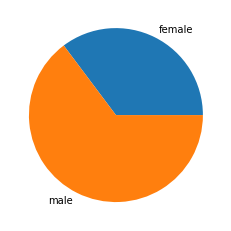

In [1998]:
plt.pie(df.groupby('Sex')['Survived'].count(),labels=['female','male'])

### Age

In [1999]:
df['Age'].isnull().sum()

177

In [2000]:
df['Age'].dtype

dtype('float64')

<AxesSubplot:xlabel='Age', ylabel='Count'>

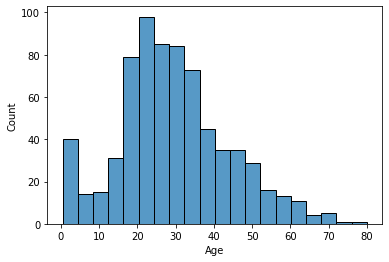

In [2001]:
sns.histplot(df['Age'])

In [2002]:
mean = df['Age'].mean()
std = df['Age'].std()

random_values = np.random.normal(loc=mean, scale=std, size=df['Age'].isnull().sum())
random_values = np.clip(random_values, 0, None)

df.loc[df['Age'].isnull(), 'Age'] = random_values

<AxesSubplot:xlabel='Age', ylabel='Count'>

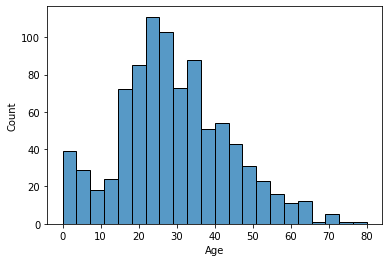

In [2003]:
sns.histplot(df['Age'])

In [2004]:
df['Age'].describe()

count    891.000000
mean      29.283441
std       14.447499
min        0.000000
25%       20.000000
50%       28.000000
75%       38.022848
max       80.000000
Name: Age, dtype: float64

* 'child=0'                
0 --> 18
* 'young=1'                
18-->39
* 'middle aged=2'    
40-->59
* 'old=3'
60-->infinty

In [2005]:
for i in range(len(df)):
    if df.iloc[i,3]<=18:
        df.iloc[i,3]= 0
    elif df.iloc[i,3]<=39:
        df.iloc[i,3]= 1
    elif df.iloc[i,3]<=59:
        df.iloc[i,3]= 2
    else:
        df.iloc[i,3]= 3
        

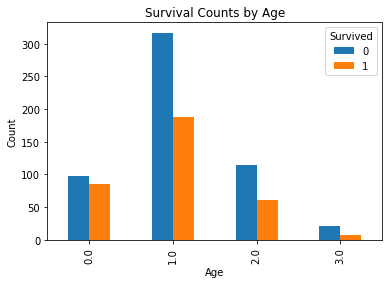

In [2006]:
counts = df.groupby('Age')['Survived'].value_counts().unstack()
counts.plot(kind='bar')
plt.title('Survival Counts by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### SibSp

In [2007]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [2008]:
df['SibSp'].isnull().sum()

0

In [2009]:
df['SibSp'].dtype

dtype('int64')

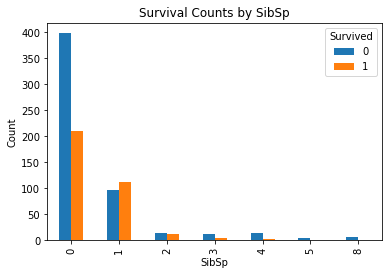

In [2010]:
counts = df.groupby('SibSp')['Survived'].value_counts().unstack()
counts
counts.plot(kind='bar')
plt.title('Survival Counts by SibSp')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.show()

### Parch

In [2011]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [2012]:
df['Parch'].isnull().sum()

0

In [2013]:
df['Parch'].dtype

dtype('int64')

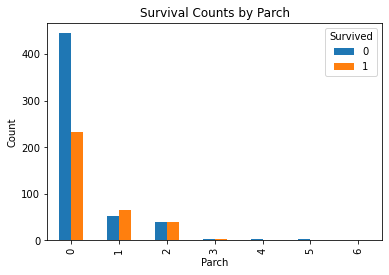

In [2014]:
counts = df.groupby('Parch')['Survived'].value_counts().unstack()
counts
counts.plot(kind='bar')
plt.title('Survival Counts by Parch')
plt.xlabel('Parch')
plt.ylabel('Count')
plt.show()

### Ticket

In [2015]:
df['Ticket'].nunique()

681

In [2016]:
df['Ticket'].isna().sum()

0

In [2017]:
df['Ticket'].dtype

dtype('O')

In [2018]:
df.drop('Ticket',axis=1,inplace=True)

### Fare	

In [2019]:
df['Fare'].isnull().sum()

0

In [2020]:
df['Fare'].dtype

dtype('float64')

<AxesSubplot:xlabel='Fare', ylabel='Count'>

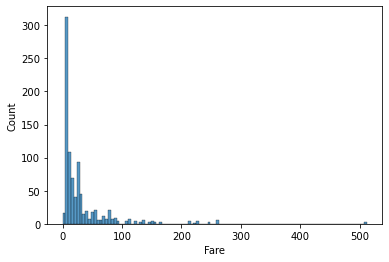

In [2021]:
sns.histplot(df['Fare'])

In [2022]:
df.drop('Fare',axis=1,inplace=True)

### Cabin

In [2023]:
df['Cabin'].nunique()

147

In [2024]:
df['Cabin'].isna().sum()

687

In [2025]:
df.drop('Cabin',axis=1,inplace=True)

### Embarked

In [2026]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [2027]:
df['Embarked'].isna().sum()

2

In [2028]:
df['Embarked'].dtype

dtype('O')

In [2029]:
df.drop('Embarked',axis=1,inplace=True)

In [2030]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,1.0,1,0
1,1,1,female,1.0,1,0
2,1,3,female,1.0,0,0
3,1,1,female,1.0,1,0
4,0,3,male,1.0,0,0
...,...,...,...,...,...,...
886,0,2,male,1.0,0,0
887,1,1,female,1.0,0,0
888,0,3,female,2.0,1,2
889,1,1,male,1.0,0,0


### model

<AxesSubplot:xlabel='Survived'>

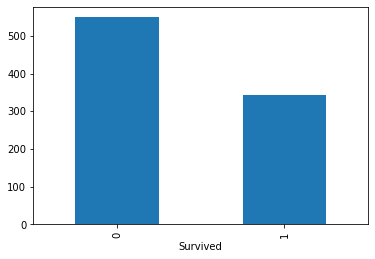

In [2031]:
p1=df.groupby('Survived')['Pclass'].count()
p1.plot.bar()

In [2032]:
x=pd.get_dummies(df[['Pclass','Sex','Age','SibSp','Parch']])
y=df['Survived']

In [2033]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_resampled, y_resampled = sm.fit_resample(x, y)

In [2034]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [2035]:
from sklearn import tree

model=tree.DecisionTreeClassifier()
model.fit(X_resampled, y_resampled)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       139
           1       0.79      0.82      0.81        84

    accuracy                           0.85       223
   macro avg       0.84      0.85      0.84       223
weighted avg       0.85      0.85      0.85       223



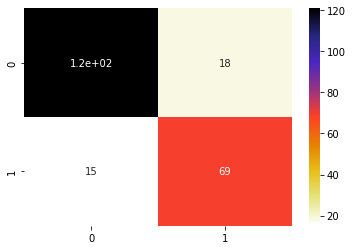

In [2036]:
from sklearn.metrics import classification_report, confusion_matrix

prediction_results = model.predict(x_test)
repo = classification_report(y_test, prediction_results)

print(repo)

cm = confusion_matrix(y_test, prediction_results)
sns.heatmap(cm, cmap="CMRmap_r", annot=True)
plt.show()

### test model

In [2037]:
df_test=pd.read_csv('test.csv')

In [2038]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [2039]:
mean = df_test['Age'].mean()
std = df_test['Age'].std()

random_values = np.random.normal(loc=mean, scale=std, size=df_test['Age'].isnull().sum())
random_values = np.clip(random_values, 0, None)

df_test.loc[df_test['Age'].isnull(), 'Age'] = random_values

In [2040]:
for i in range(len(df_test)):
    if df_test.iloc[i,4]<=18:
        df_test.iloc[i,4]= 0
    elif df_test.iloc[i,4]<=39:
        df_test.iloc[i,4]= 1
    elif df_test.iloc[i,4]<=59:
        df_test.iloc[i,4]= 2
    else:
        df_test.iloc[i,4]= 3

In [2041]:
x_test=pd.get_dummies(df_test[['Pclass','Sex','Age','SibSp','Parch']])

In [2043]:
predictions = model.predict(x_test)

output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
